# Analysis of Omicron Virus

TODO - In this analysis I have used a dataset that contains the information about the cases information. I have used NumPy, pandas, matplotlib and seaborn.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset 

In [10]:
!pip install jovian --upgrade

In [11]:
#Installing Pandas
!pip install pandas --upgrade

In [12]:
import pandas as pd

The csv file(dataset) has been uploaded manually

In [13]:
covid_df = pd.read_csv("owid-covid-data.csv")

In [14]:
covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157703,ZWE,Africa,Zimbabwe,2022-01-23,228254.0,75.0,310.857,5294.0,2.0,6.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
157704,ZWE,Africa,Zimbabwe,2022-01-24,228541.0,287.0,297.286,5305.0,11.0,6.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
157705,ZWE,Africa,Zimbabwe,2022-01-25,228776.0,235.0,330.857,5316.0,11.0,8.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
157706,ZWE,Africa,Zimbabwe,2022-01-26,228943.0,167.0,293.714,5321.0,5.0,7.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Let us save and upload our work to Jovian before continuing.

In [15]:
project_name = "zerotopandas-course-project"

In [16]:
import jovian

In [17]:
jovian.commit(project="zerotopandas-course-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "divyesh/zerotopandas-course-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/divyesh/zerotopandas-course-project


'https://jovian.ai/divyesh/zerotopandas-course-project'

## Data Preparation and Cleaning

 Now we have loaded the dataset into a dataframe(covid_df).


In [18]:
shape_covid = covid_df.shape

In [19]:
#This will show the number of rows and columns respectively
shape_covid

(157708, 67)

**Q1. Unique locations in the dataset**

In [20]:
countries = covid_df['location'].unique()

In [21]:
countries

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

**Q2. Let's find the number of unique locations**

In [22]:
num_countries = len(countries)

In [23]:
print("There are a total of",num_countries, "unique countries in the dataset.")

There are a total of 238 unique countries in the dataset.


Now that there are a total of 238 unique countries in the df, we will pick one country to provide more accurate data. Let's pick **India**

In [24]:
india_df = covid_df[covid_df["location"] == 'India']

In [25]:
india_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
66100,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
66101,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
66102,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
66103,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
66104,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66824,IND,Asia,India,2022-01-23,39543328.0,306064.0,309010.714,489848.0,439.0,485.286,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
66825,IND,Asia,India,2022-01-24,39799202.0,255874.0,311561.571,490462.0,614.0,528.714,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
66826,IND,Asia,India,2022-01-25,40085116.0,285914.0,311982.143,491127.0,665.0,560.714,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
66827,IND,Asia,India,2022-01-26,40371500.0,286384.0,307532.429,491700.0,573.0,572.429,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


Now that we have got the value for the specified location, let's find the number of entries in this df

In [26]:
print("In this there are a total of {} entries".format(india_df.shape[0]))

In this there are a total of 729 entries


In [27]:
#Finding if there is any missing data
total_tests_missing = india_df.isna().sum()

In [28]:
print("There is/are a total of {} missing data".format(total_tests_missing))

There is/are a total of iso_code                                     0
continent                                    0
location                                     0
date                                         0
total_cases                                  0
                                          ... 
human_development_index                      0
excess_mortality_cumulative_absolute       729
excess_mortality_cumulative                729
excess_mortality                           729
excess_mortality_cumulative_per_million    729
Length: 67, dtype: int64 missing data


In [29]:
import jovian

In [30]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "divyesh/zerotopandas-course-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/divyesh/zerotopandas-course-project


'https://jovian.ai/divyesh/zerotopandas-course-project'

## Exploratory Analysis and Visualization
We will now analyse the data visually and numerically.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [31]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

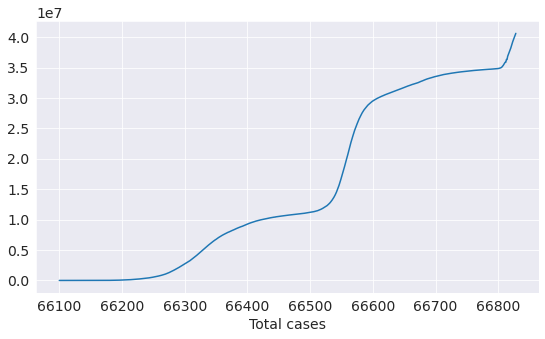

In [32]:
#here we can see that the cases keeps on increasing
india_df["total_cases"].plot()
plt.xlabel("Total cases");

This graph clearly shows that with time the cases were increasing rapidly

 Now let's analyze how the number of cases and deaths simultaneously

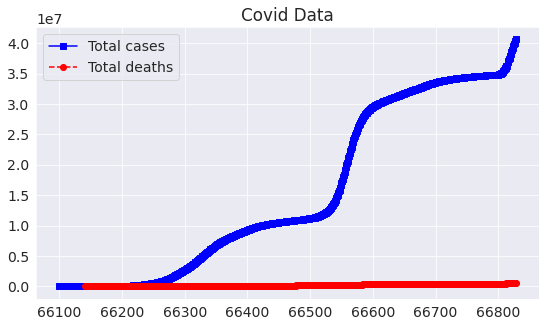

In [33]:
plt.plot(india_df.total_cases, 's-b')
plt.plot(india_df.total_deaths, 'o--r')

plt.title("Covid Data")
plt.legend(['Total cases', 'Total deaths']);

So it can be noticed that the vaccination drives and the awareness was good that the ratio number of people diagnosed with the virus and number of people died is very very less.

Let's analyse if the number of cases increased or decreased with time using the histogram

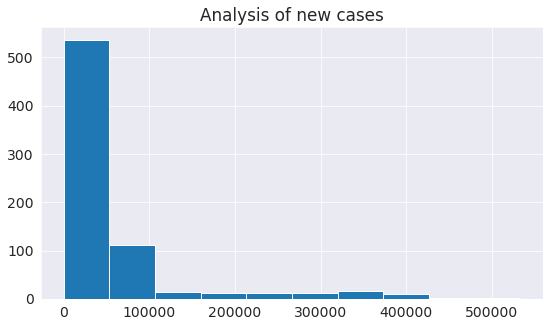

In [34]:
plt.title("Analysis of new cases")
plt.hist(india_df.new_cases);

Clearly visible that the number of cases started to decrease with time.

Now let's find the ratio of new cases and deaths.

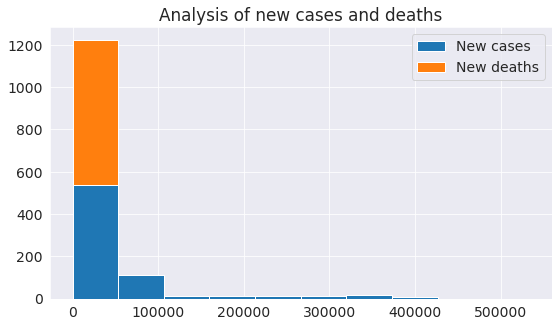

In [35]:
plt.title('Analysis of new cases and deaths')

plt.hist([india_df.new_cases, india_df.new_deaths], stacked=True);

plt.legend(['New cases', 'New deaths']);

It is visible that once the number of cases and deaths both were very high but then it came under control over time. 

Let us save and upload our work to Jovian before continuing

In [36]:
import jovian

In [37]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "divyesh/zerotopandas-course-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/divyesh/zerotopandas-course-project


'https://jovian.ai/divyesh/zerotopandas-course-project'

## Asking and Answering Questions

In [38]:
covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157703,ZWE,Africa,Zimbabwe,2022-01-23,228254.0,75.0,310.857,5294.0,2.0,6.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
157704,ZWE,Africa,Zimbabwe,2022-01-24,228541.0,287.0,297.286,5305.0,11.0,6.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
157705,ZWE,Africa,Zimbabwe,2022-01-25,228776.0,235.0,330.857,5316.0,11.0,8.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
157706,ZWE,Africa,Zimbabwe,2022-01-26,228943.0,167.0,293.714,5321.0,5.0,7.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


**Q1. What is the number of continents' that is included in the dataset**

In [39]:
continents  = covid_df['continent'].unique()

In [40]:
num_continents = len(continents)

In [41]:
num_continents

7

**Q2. What was the minimum and maximum cases recorded on a single day?**

In [42]:
max_cases = covid_df["new_cases"].max()

In [43]:
print("The maximum number of cases recorded on a single day is {}".format(max_cases))

The maximum number of cases recorded on a single day is 4247442.0


In [44]:
min_cases = covid_df["new_cases"].min()

In [45]:
print("The minimum number of cases recorded on a single day is {}".format(min_cases))

The minimum number of cases recorded on a single day is -74347.0


The negative data in the above question shows the error in the data. 

**Q3. What is the total number of cases in each continent?**

In [46]:
continents_name = covid_df['continent'].unique()

In [47]:
continents_name

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [48]:
for i in continents_name:
    cases_max = covid_df["new_cases"].sum()
    print("The total number of cases in {} is {}".format(i,cases_max))

The total number of cases in Asia is 1546331370.0
The total number of cases in nan is 1546331370.0
The total number of cases in Europe is 1546331370.0
The total number of cases in Africa is 1546331370.0
The total number of cases in North America is 1546331370.0
The total number of cases in South America is 1546331370.0
The total number of cases in Oceania is 1546331370.0


**Q4. What is maximum number of female and male smokers in a country?**

In [49]:
f_smoke = covid_df["female_smokers"].max()

In [50]:
print("The maximum number of female smokers in a country is {}".format(f_smoke))

The maximum number of female smokers in a country is 44.0


In [51]:
m_smoke = covid_df["male_smokers"].max()

In [52]:
print("The maximum number of male smokers in a country is {}".format(m_smoke))

The maximum number of male smokers in a country is 78.1


**Q5. What is the total number of male and female smokers respectively in each continent?**

In [53]:
continents_name = covid_df['continent'].unique()

In [54]:
continents_name

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [55]:
m = 0
for i in continents_name:
    smokers_conm = covid_df['male_smokers'].sum()
    print("The total number of male smokers in {} is {}".format(i,smokers_conm))
    m+=smokers_conm

The total number of male smokers in Asia is 3251800.3949999996
The total number of male smokers in nan is 3251800.3949999996
The total number of male smokers in Europe is 3251800.3949999996
The total number of male smokers in Africa is 3251800.3949999996
The total number of male smokers in North America is 3251800.3949999996
The total number of male smokers in South America is 3251800.3949999996
The total number of male smokers in Oceania is 3251800.3949999996


In [56]:
f = 0
for i in continents_name:
    smokers_conf = covid_df['female_smokers'].sum()
    print("The total number of female smokers in {} is {}".format(i,smokers_conf))
    f+=smokers_conf

The total number of female smokers in Asia is 1070171.458
The total number of female smokers in nan is 1070171.458
The total number of female smokers in Europe is 1070171.458
The total number of female smokers in Africa is 1070171.458
The total number of female smokers in North America is 1070171.458
The total number of female smokers in South America is 1070171.458
The total number of female smokers in Oceania is 1070171.458


In [57]:
print("There are", abs(m-f), "more male smokers")

There are 15271402.558999995 more male smokers


Let us save and upload our work to Jovian before continuing.

In [58]:
import jovian

In [59]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "divyesh/zerotopandas-course-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/divyesh/zerotopandas-course-project


'https://jovian.ai/divyesh/zerotopandas-course-project'

## Inferences and Conclusion

In this Data analysis course project we had made several inferences pertaining to the corona cases and even we took a different track and discussed about the smokers just not to beat around the bush. 
So I would like to conclude my course project here. I would like to thank the creators of this course for the amazing content and making me do my project

In [60]:
import jovian

In [61]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "divyesh/zerotopandas-course-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/divyesh/zerotopandas-course-project


'https://jovian.ai/divyesh/zerotopandas-course-project'

## References and Future Work

I used the official webiste documentations of the libraries Pandas, Matplotlib.
For the datasets I used the kaggle dataset. 

In [66]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>